<a href="https://colab.research.google.com/github/RUST196/Andrs/blob/main/EVprojectaicte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/content/Electric_Vehicle_Population_Size_History_By_County_.csv")

In [3]:
df.head() # top 5 rows

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [4]:
df.shape

(20819, 10)

In [5]:
df.info

<bound method DataFrame.info of                     Date          County State Vehicle Primary Use  \
0      September 30 2022       Riverside    CA           Passenger   
1       December 31 2022  Prince William    VA           Passenger   
2        January 31 2020          Dakota    MN           Passenger   
3           June 30 2022           Ferry    WA               Truck   
4           July 31 2021         Douglas    CO           Passenger   
...                  ...             ...   ...                 ...   
20814    January 31 2023      Rockingham    NH           Passenger   
20815       July 31 2020     Carson City    NV           Passenger   
20816   February 28 2022          Island    WA           Passenger   
20817   December 31 2020       San Diego    CA           Passenger   
20818   November 30 2019       Goochland    VA           Passenger   

      Battery Electric Vehicles (BEVs)  \
0                                    7   
1                                    1   
2                                    0   
3                                    0   
4                                    0   
...                                ...   
20814                                1   
20815                                1   
20816                              744   
20817                               14   
20818                                3   

      Plug-In Hybrid Electric Vehicles (PHEVs) Electric Vehicle (EV) Total  \
0                                            0                           7   
1                                            2                           3   
2                                            1                           1   
3                                            0                           0   
4                                            1                           1   
...                                        ...                         ...   
20814                                        0                           1   
20815                                        0                           1   
20816                                      350                       1,094   
20817                                        2                          16   
20818                                        1                           4   

      Non-Electric Vehicle Total Total Vehicles  Percent Electric Vehicles  
0                            460            467                       1.50  
1                            188            191                       1.57  
2                             32             33                       3.03  
3                          3,575          3,575                       0.00  
4                             83             84                       1.19  
...                          ...            ...                        ...  
20814                         14             15                       6.67  
20815                         10             11                       9.09  
20816                     62,257         63,351                       1.73  
20817                      2,724          2,740                       0.58  
20818                        271            275                       1.45  

[20819 rows x 10 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

In [7]:
df.isnull().sum()

,0
Date,0
County,86
State,86
Vehicle Primary Use,0
Battery Electric Vehicles (BEVs),0
Plug-In Hybrid Electric Vehicles (PHEVs),0
Electric Vehicle (EV) Total,0
Non-Electric Vehicle Total,0
Total Vehicles,0
Percent Electric Vehicles,0


In [8]:
Q1 = df['Percent Electric Vehicles'].quantile(0.25)
Q3 = df['Percent Electric Vehicles'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('lower_bound:', lower_bound)
print('upper_bound:', upper_bound)

# Identify outliers
outliers = df[(df['Percent Electric Vehicles'] < lower_bound) | (df['Percent Electric Vehicles'] > upper_bound)]
print("Number of outliers in 'Percent Electric Vehicles':", outliers.shape[0])

lower_bound: -3.5174999999999996
upper_bound: 6.9025
Number of outliers in 'Percent Electric Vehicles': 2476


In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Removes rows where "Date" conversion failed
df = df[df['Date'].notnull()]

# Removes rows where the target (EV Total) is missing
df = df[df['Electric Vehicle (EV) Total'].notnull()]

# Fill missing values
df['County'] = df['County'].fillna('Unknown')
df['State'] = df['State'].fillna('Unknown')

# Confirm remaining nulls
print("Missing after fill:")
print(df[['County', 'State']].isnull().sum())

df.head()

Missing after fill:
County    0
State     0
dtype: int64


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2022-09-30,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,2022-12-31,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,2020-01-31,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,2022-06-30,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,2021-07-31,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [10]:
# Cap the outliers - it keeps all the data while reducing the skew from extreme values.

df['Percent Electric Vehicles'] = np.where(df['Percent Electric Vehicles'] > upper_bound, upper_bound,
                                 np.where(df['Percent Electric Vehicles'] < lower_bound, lower_bound, df['Percent Electric Vehicles']))

# Identify outliers
outliers = df[(df['Percent Electric Vehicles'] < lower_bound) | (df['Percent Electric Vehicles'] > upper_bound)]
print("Number of outliers in 'Percent Electric Vehicles':", outliers.shape[0])

Number of outliers in 'Percent Electric Vehicles': 0


In [11]:
df['Percent Electric Vehicles'] = np.where(df['Percent Electric Vehicles'] > upper_bound, upper_bound,
                                 np.where(df['Percent Electric Vehicles'] < lower_bound, lower_bound, df['Percent Electric Vehicles']))

# Identify outliers
outliers = df[(df['Percent Electric Vehicles'] < lower_bound) | (df['Percent Electric Vehicles'] > upper_bound)]
print("Number of outliers in 'Percent Electric Vehicles':", outliers.shape[0])

Number of outliers in 'Percent Electric Vehicles': 0


In [12]:
# Most EVs by County
top_counties = df.groupby('County')['Electric Vehicle (EV) Total'].sum().sort_values(ascending=False).head(3)
bottom_counties = df.groupby('County')['Electric Vehicle (EV) Total'].sum().sort_values().head(3)

print("Top 3 Counties:\n", top_counties)
print("\nBottom 3 Counties:\n", bottom_counties)

Top 3 Counties:
 County
Lewis       9300048800112591030400044101411038800421021000...
Clark       9003,2720006,94473,0582,3119007,147700006,1959...
Honolulu    8686956568876966869466365666463747668473466677...
Name: Electric Vehicle (EV) Total, dtype: object

Bottom 3 Counties:
 County
Kittitas    0008161381106372195640046401080571101203282882...
Columbia    0110000810011004990000104181716196001810171212...
Kitsap      011913113,825861169401,1831,5833,3413,75197041...
Name: Electric Vehicle (EV) Total, dtype: object


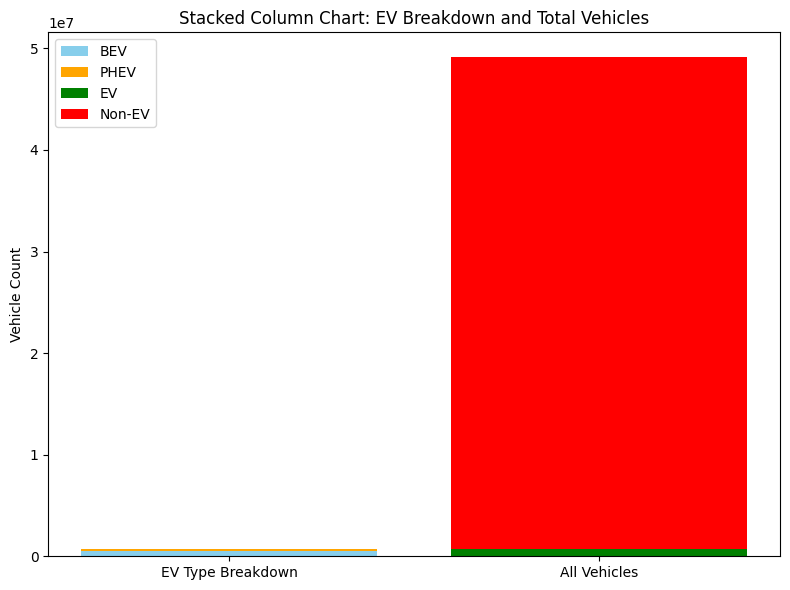

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
try:
    df = pd.read_csv("/content/Electric_Vehicle_Population_Size_History_By_County_.csv")
except FileNotFoundError:
    print("Error: The file '/content/Electric_Vehicle_Population_Size_History_By_County_.csv' was not found.")
    # Exit or handle the error appropriately if the file is not found
    # exit() # Removed exit() to allow subsequent cells to be modified and potentially run

# Check if df was loaded successfully before proceeding
if 'df' in locals():
    # Sample a smaller subset of the data for faster processing
    df = df.sample(frac=0.1, random_state=42).reset_index(drop=True)

    # Data Cleaning and Preprocessing (incorporating steps from previous cells)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df[df['Date'].notnull()]
    df['County'] = df['County'].fillna('Unknown')
    df['State'] = df['State'].fillna('Unknown')

    # Convert relevant columns to numeric, coercing errors
    for col in ['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles']:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce').fillna(0) # Fill NaN after coercion with 0

    # Calculate and cap outliers for 'Percent Electric Vehicles'
    Q1 = df['Percent Electric Vehicles'].quantile(0.25)
    Q3 = df['Percent Electric Vehicles'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df['Percent Electric Vehicles'] = np.where(df['Percent Electric Vehicles'] > upper_bound, upper_bound,
                                     np.where(df['Percent Electric Vehicles'] < lower_bound, lower_bound, df['Percent Electric Vehicles']))

    # Extract year, month, and numeric_date after ensuring 'Date' is valid
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['numeric_date'] = df['Date'].dt.year * 12 + df['Date'].dt.month


    # Total sums for stacked column chart
    bev_total = df['Battery Electric Vehicles (BEVs)'].sum()
    phev_total = df['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum()
    ev_total = df['Electric Vehicle (EV) Total'].sum()
    non_ev_total = df['Non-Electric Vehicle Total'].sum()
    all_total = df['Total Vehicles'].sum()

    # Stacked column chart
    fig, ax = plt.subplots(figsize=(8, 6))

    # Stack EV types
    ax.bar('EV Type Breakdown', bev_total, label='BEV', color='skyblue')
    ax.bar('EV Type Breakdown', phev_total, bottom=bev_total, label='PHEV', color='orange')

    # Stack Total Vehicle categories
    ax.bar('All Vehicles', ev_total, label='EV', color='green')
    ax.bar('All Vehicles', non_ev_total, bottom=ev_total, label='Non-EV', color='red')

    # Final touches
    ax.set_ylabel('Vehicle Count')
    ax.set_title('Stacked Column Chart: EV Breakdown and Total Vehicles')
    ax.legend()
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame 'df' was not loaded due to the file error.")

In [4]:
# Extract year, month, and date
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['numeric_date'] = df['Date'].dt.year * 12 + df['Date'].dt.month

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['county_encoded'] = le.fit_transform(df['County'])

In [6]:
df = df.sort_values(['County', 'Date'])

In [7]:
# Assign time index per county
df['months_since_start'] = df.groupby('County').cumcount()

#Lags are only based on past data from the same county
# === Create lag features (1–3 months) ===
for lag in [1, 2, 3]:
    df[f'ev_total_lag{lag}'] = df.groupby('County')['Electric Vehicle (EV) Total'].shift(lag)

# === Rolling average (3-month, prior) ===
df['ev_total_roll_mean_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                               .transform(lambda x: x.shift(1).rolling(3).mean())

# === Percent change (no fill method) ===
df['ev_total_pct_change_1'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                .pct_change(periods=1, fill_method=None)

df['ev_total_pct_change_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                .pct_change(periods=3, fill_method=None)

# === Clean up any infs/NaNs ===
df['ev_total_pct_change_1'] = df['ev_total_pct_change_1'].replace([np.inf, -np.inf], np.nan).fillna(0)
df['ev_total_pct_change_3'] = df['ev_total_pct_change_3'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [8]:
# Cumulative EV count per county
df['cumulative_ev'] = df.groupby('County')['Electric Vehicle (EV) Total'].cumsum()

# 6-month rolling linear slope of cumulative growth
df['ev_growth_slope'] = df.groupby('County')['cumulative_ev'].transform(
    lambda x: x.rolling(6).apply(lambda y: np.polyfit(range(len(y)), y, 1)[0] if len(y) == 6 else np.nan)
)

In [9]:
df = df.dropna().reset_index(drop=True)
df.to_csv('preprocessed_ev_data.csv', index=False)

df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,...,county_encoded,months_since_start,ev_total_lag1,ev_total_lag2,ev_total_lag3,ev_total_roll_mean_3,ev_total_pct_change_1,ev_total_pct_change_3,cumulative_ev,ev_growth_slope
0,2018-05-31,Ada,ID,Passenger,0,2,2,341,343,0.58,...,0,5,2.0,2.0,2.0,2.0,0.0,0.0,10,1.857143
1,2018-06-30,Ada,ID,Passenger,0,2,2,332,334,0.60,...,0,6,2.0,2.0,2.0,2.0,0.0,0.0,12,2.000000
2,2018-07-31,Ada,ID,Passenger,0,2,2,329,331,0.60,...,0,7,2.0,2.0,2.0,2.0,0.0,0.0,14,2.000000
3,2018-08-31,Ada,ID,Passenger,0,2,2,325,327,0.61,...,0,8,2.0,2.0,2.0,2.0,0.0,0.0,16,2.000000
4,2018-09-30,Ada,ID,Passenger,0,2,2,327,329,0.61,...,0,9,2.0,2.0,2.0,2.0,0.0,0.0,18,2.000000


In [10]:
# Define features and target
features = [
    'months_since_start',
    'county_encoded',
    'ev_total_lag1',
    'ev_total_lag2',
    'ev_total_lag3',
    'ev_total_roll_mean_3',
    'ev_total_pct_change_1',
    'ev_total_pct_change_3',
    'ev_growth_slope',
]

target = 'Electric Vehicle (EV) Total'
X = df[features]
y = df[target]

X.head()

,months_since_start,county_encoded,ev_total_lag1,ev_total_lag2,ev_total_lag3,ev_total_roll_mean_3,ev_total_pct_change_1,ev_total_pct_change_3,ev_growth_slope
0,5,0,2.0,2.0,2.0,2.0,0.0,0.0,1.857143
1,6,0,2.0,2.0,2.0,2.0,0.0,0.0,2.000000
2,7,0,2.0,2.0,2.0,2.0,0.0,0.0,2.000000
3,8,0,2.0,2.0,2.0,2.0,0.0,0.0,2.000000
4,9,0,2.0,2.0,2.0,2.0,0.0,0.0,2.000000


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model import RandomizedSearchCV


# Define param distribution
param_dist = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None]
}

# Base model
rf = RandomForestRegressor(random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,  # Reduced further to 5 random combos to speed up
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit model
random_search.fit(X_train, y_train)

# Best model
model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Predict and evaluate
y_pred = model.predict(X_test)
X_test.head()

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 15}


,months_since_start,county_encoded,ev_total_lag1,ev_total_lag2,ev_total_lag3,ev_total_roll_mean_3,ev_total_pct_change_1,ev_total_pct_change_3,ev_growth_slope
15508,28,248,1.0,1.0,1.0,1.000000,0.0,0.0,1.000000
15925,31,256,20.0,0.0,20.0,13.333333,-1.0,-1.0,11.857143
484,30,5,1.0,1.0,1.0,1.000000,0.0,0.0,1.000000
5537,143,88,168.0,0.0,0.0,56.000000,-1.0,0.0,60.971429
4816,62,80,3.0,3.0,3.0,3.000000,0.0,0.0,3.000000


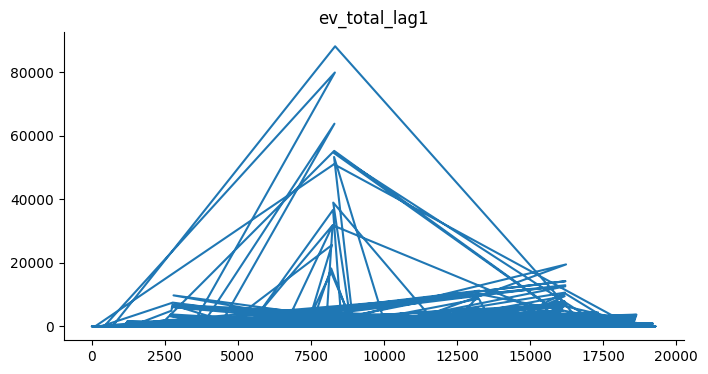

In [14]:
# @title ev_total_lag1

from matplotlib import pyplot as plt
X_test['ev_total_lag1'].plot(kind='line', figsize=(8, 4), title='ev_total_lag1')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
comparison_df = pd.DataFrame({
    'Actual EV Count': y_test.values,
    'Predicted EV Count': y_pred
})

# Round for readability
comparison_df['Predicted EV Count'] = comparison_df['Predicted EV Count'].round(2)

# Optionally reset index if needed
comparison_df.reset_index(drop=True, inplace=True)

# Show the first 10 rows
comparison_df.head(10)

,Actual EV Count,Predicted EV Count
0,1,1.00
1,0,0.00
2,1,1.00
3,0,0.00
4,3,3.08
5,2,2.01
6,10,10.82
7,1,1.00
8,1,1.00
9,6,5.07


MAE: 84.29, RMSE: 1342.70, R2 Score: 0.74


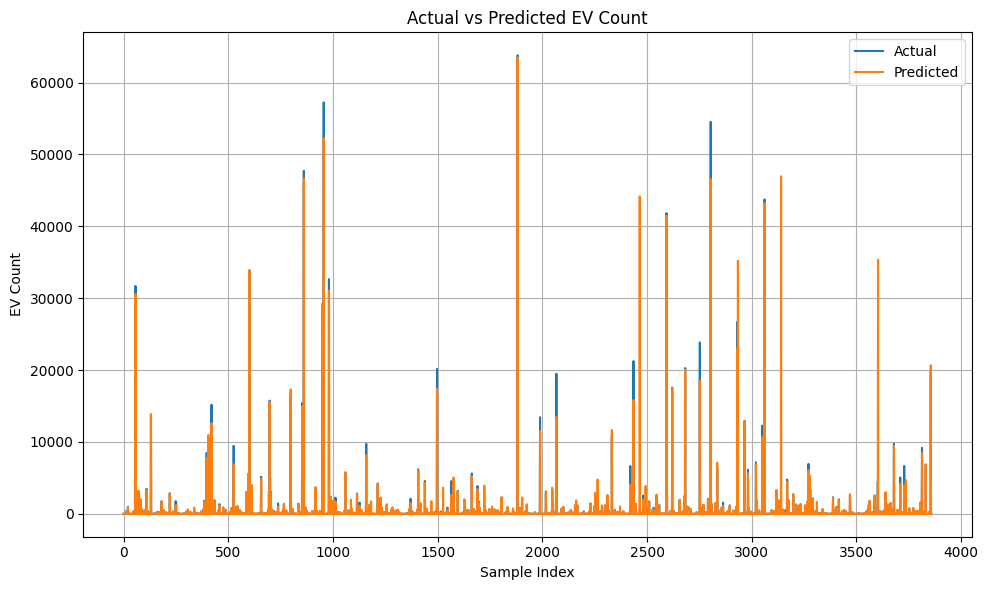

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2Score = r2_score(y_true, y_pred)
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2Score:.2f}")

evaluate(y_test, y_pred)

# Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted EV Count")
plt.xlabel("Sample Index")
plt.ylabel("EV Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

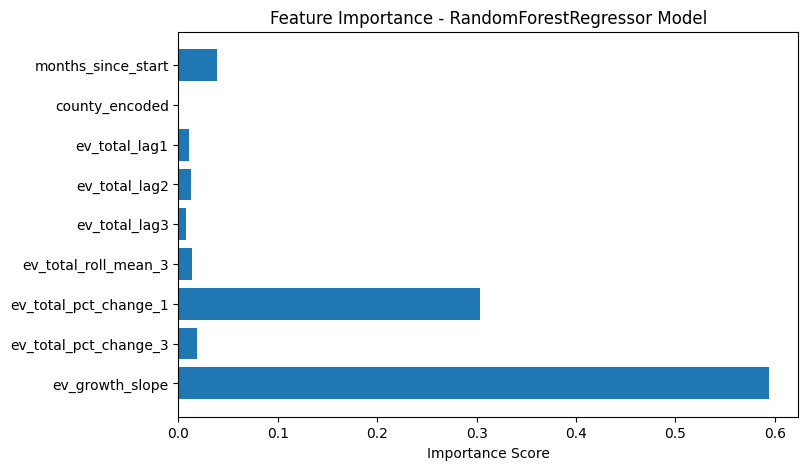

In [18]:
importances = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(8,5))
plt.barh(features, importances)
plt.xlabel('Importance Score')
# Updated the title to reflect that the model is RandomForestRegressor
plt.title('Feature Importance - RandomForestRegressor Model')
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

In [21]:
# Select the 'County' and 'county_encoded' columns
county_info = df[['County']].copy()
county_info['county_encoded'] = X['county_encoded']

print("List of unique counties:")
print(df['County'].dropna().unique())

print("Total unique counties:", df['County'].nunique())

List of unique counties:
['Putnam' 'Moore' 'Ferry' 'Williams' 'Middlesex' 'San Joaquin'
 "St. Mary's" 'Chelan' 'Broward' 'Lake' 'Muscogee' 'Island' 'Manatee'
 'Pima' 'Penobscot' 'El Paso' 'DeKalb' 'Pennington' 'Clackamas' 'Charles'
 'Clark' 'Meade' 'Deschutes' 'Hampshire' 'Grant' 'Rogers' 'Loudoun'
 'Boone' 'Dakota' 'Caddo' 'Maricopa' 'York' 'Manassas' 'Wake' 'Pierce'
 'Grays Harbor' 'Klickitat' 'Wahkiakum' 'Howard' 'Mercer' 'Napa' 'Klamath'
 'St. Lucie' 'Harnett' 'Williamsburg' 'Sonoma' 'Okanogan' 'Allegheny'
 'Cowlitz' 'Carroll' 'Camden' 'Riverside' 'Franklin' 'Dorchester'
 'Pend Oreille' 'Shelby' 'Sacramento' 'Albemarle' 'Juneau' 'Anne Arundel'
 'Travis' 'Asotin' 'Columbia' 'Richland' 'Bucks' 'Eagle' 'Oklahoma'
 'Harris' 'Lee' 'Whitman' 'San Juan' 'Clallam' 'New Haven' 'Fulton'
 'Orange' 'Texas' 'Benton' 'Larimer' 'Wilson' 'Champaign' 'Montgomery'
 'Houston' 'Kern' 'Jefferson' 'Virginia Beach' 'Plaquemines' 'Essex'
 'Adams' 'Skagit' 'Cook' 'Mason' 'Kootenai' 'Yavapai' 'Cochise' 'Dal

In [22]:
import joblib

# Save the trained model
joblib.dump(model, 'random_forest_ev_model.pkl')

print("Trained model saved as 'random_forest_ev_model.pkl'")

Trained model saved as 'random_forest_ev_model.pkl'


# Task
Explain the error in the selected code, fix it, and generate a forecast for EV counts for a specific county, then visualize the results.

## Review and re-structure data preparation

### Subtask:
Examine the cells from data loading (cell 1FN_Dt0AJbeu) up to the feature engineering (cells ZsWGv5mOJ943 to 2zYQnpegKQFg) to ensure that 'numeric_date' and 'county_encoded', and all other necessary columns for forecasting, are correctly created and maintained in the `df` DataFrame after data sampling.


**Reasoning**:
Review cells 1FN_Dt0AJbeu, ZsWGv5mOJ943, jVlHnPTKKHYD, 6v5O1vKEKK4Y, 2zYQnpegKQFg, _c_rdjPVKWvl, and YgVGZxpDKYWY to check if 'numeric_date', 'county_encoded', and other features are correctly created and maintained after sampling and cleaning, and verify the presence of required columns in `df` for forecasting.



In [2]:
# Review cell 1FN_Dt0AJbeu: Check for correct sampling and initial cleaning
print("Columns and their dtypes after initial cleaning and sampling (cell 1FN_Dt0AJbeu related):")
print(df[['Date', 'County', 'State', 'Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles', 'Percent Electric Vehicles', 'year', 'month', 'numeric_date']].info())
print("\nHead after initial cleaning and sampling:")
display(df[['Date', 'County', 'State', 'Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles', 'Percent Electric Vehicles', 'year', 'month', 'numeric_date']].head())

# Review cell ZsWGv5mOJ943: Check for county_encoded creation
print("\nColumns and their dtypes after county encoding (cell ZsWGv5mOJ943 related):")
print(df[['County', 'county_encoded']].info())
print("\nHead after county encoding:")
display(df[['County', 'county_encoded']].head())

# Review cells jVlHnPTKKHYD, 6v5O1vKEKK4Y, 2zYQnpegKQFg: Check for sorting and feature engineering
print("\nColumns and their dtypes after sorting and feature engineering (cells jVlHnPTKKHYD, 6v5O1vKEKK4Y, 2zYQnpegKQFg related):")
print(df[['Date', 'County', 'Electric Vehicle (EV) Total', 'months_since_start', 'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3', 'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3', 'cumulative_ev', 'ev_growth_slope']].info())
print("\nHead after sorting and feature engineering:")
display(df[['Date', 'County', 'Electric Vehicle (EV) Total', 'months_since_start', 'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3', 'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3', 'cumulative_ev', 'ev_growth_slope']].head())

# Review cell _c_rdjPVKWvl: Check the result of dropna()
print("\nShape after dropping NaNs (cell _c_rdjPVKWvl related):")
print(df.shape)
print("\nHead after dropping NaNs:")
display(df.head()) # Display head of the whole dataframe

# Review cell YgVGZxpDKYWY: Verify columns used for features
print("\nColumns used as features (cell YgVGZxpDKYWY related):")
print(features)
print("\nCheck for required columns in df for forecasting:")
required_cols_for_forecast = ['Date', 'County', 'Electric Vehicle (EV) Total', 'year', 'month',
                              'numeric_date', 'county_encoded', 'months_since_start',
                              'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3',
                              'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3',
                              'ev_growth_slope']
print(f"Are all required columns present? {all(col in df.columns for col in required_cols_for_forecast)}")

Columns and their dtypes after initial cleaning and sampling (cell 1FN_Dt0AJbeu related):


NameError: name 'df' is not defined

**Reasoning**:
The previous command failed because the dataframe `df` was not defined in the current kernel session. Need to re-execute the cells that load and preprocess the data to define `df` and the necessary variables like `le` and `features`.



In [3]:
# Re-execute data loading and preprocessing from cell 1FN_Dt0AJbeu
try:
    df = pd.read_csv("/content/Electric_Vehicle_Population_Size_History_By_County_.csv")
except FileNotFoundError:
    print("Error: The file '/content/Electric_Vehicle_Population_Size_History_By_County_.csv' was not found.")

# Check if df was loaded successfully before proceeding
if 'df' in locals():
    # Sample a smaller subset of the data for faster processing
    df = df.sample(frac=0.1, random_state=42).reset_index(drop=True)

    # Data Cleaning and Preprocessing (incorporating steps from previous cells)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df[df['Date'].notnull()]
    df['County'] = df['County'].fillna('Unknown')
    df['State'] = df['State'].fillna('Unknown')

    # Convert relevant columns to numeric, coercing errors
    for col in ['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles']:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce').fillna(0) # Fill NaN after coercion with 0

    # Calculate and cap outliers for 'Percent Electric Vehicles'
    Q1 = df['Percent Electric Vehicles'].quantile(0.25)
    Q3 = df['Percent Electric Vehicles'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df['Percent Electric Vehicles'] = np.where(df['Percent Electric Vehicles'] > upper_bound, upper_bound,
                                     np.where(df['Percent Electric Vehicles'] < lower_bound, lower_bound, df['Percent Electric Vehicles']))

    # Extract year, month, and numeric_date after ensuring 'Date' is valid
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['numeric_date'] = df['Date'].dt.year * 12 + df['Date'].dt.month

    # Re-execute county encoding from cell ZsWGv5mOJ943
    le = LabelEncoder()
    df['county_encoded'] = le.fit_transform(df['County'])

    # Re-execute sorting and feature engineering from cells jVlHnPTKKHYD, 6v5O1vKEKK4Y, 2zYQnpegKQFg
    df = df.sort_values(['County', 'Date'])

    # Assign time index per county
    df['months_since_start'] = df.groupby('County').cumcount()

    #Lags are only based on past data from the same county
    # === Create lag features (1–3 months) ===
    for lag in [1, 2, 3]:
        df[f'ev_total_lag{lag}'] = df.groupby('County')['Electric Vehicle (EV) Total'].shift(lag)

    # === Rolling average (3-month, prior) ===
    df['ev_total_roll_mean_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                   .transform(lambda x: x.shift(1).rolling(3).mean())

    # === Percent change (no fill method) ===
    df['ev_total_pct_change_1'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                    .pct_change(periods=1, fill_method=None)

    df['ev_total_pct_change_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                    .pct_change(periods=3, fill_method=None)

    # === Clean up any infs/NaNs ===
    df['ev_total_pct_change_1'] = df['ev_total_pct_change_1'].replace([np.inf, -np.inf], np.nan).fillna(0)
    df['ev_total_pct_change_3'] = df['ev_total_pct_change_3'].replace([np.inf, -np.inf], np.nan).fillna(0)

    # Cumulative EV count per county
    df['cumulative_ev'] = df.groupby('County')['Electric Vehicle (EV) Total'].cumsum()

    # 6-month rolling linear slope of cumulative growth
    df['ev_growth_slope'] = df.groupby('County')['cumulative_ev'].transform(
        lambda x: x.rolling(6).apply(lambda y: np.polyfit(range(len(y)), y, 1)[0] if len(y) == 6 else np.nan)
    )

    # Re-execute dropna from cell _c_rdjPVKWvl
    df = df.dropna().reset_index(drop=True)

    # Re-define features from cell YgVGZxpDKYWY
    features = [
        'months_since_start',
        'county_encoded',
        'ev_total_lag1',
        'ev_total_lag2',
        'ev_total_lag3',
        'ev_total_roll_mean_3',
        'ev_total_pct_change_1',
        'ev_total_pct_change_3',
        'ev_growth_slope',
    ]

    # Now, check the dataframe as in the previous command
    print("Columns and their dtypes after initial cleaning and sampling (cell 1FN_Dt0AJbeu related):")
    print(df[['Date', 'County', 'State', 'Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles', 'Percent Electric Vehicles', 'year', 'month', 'numeric_date']].info())
    print("\nHead after initial cleaning and sampling:")
    display(df[['Date', 'County', 'State', 'Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles', 'Percent Electric Vehicles', 'year', 'month', 'numeric_date']].head())

    print("\nColumns and their dtypes after county encoding (cell ZsWGv5mOJ943 related):")
    print(df[['County', 'county_encoded']].info())
    print("\nHead after county encoding:")
    display(df[['County', 'county_encoded']].head())

    print("\nColumns and their dtypes after sorting and feature engineering (cells jVlHnPTKKHYD, 6v5O1vKEKK4Y, 2zYQnpegKQFg related):")
    print(df[['Date', 'County', 'Electric Vehicle (EV) Total', 'months_since_start', 'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3', 'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3', 'cumulative_ev', 'ev_growth_slope']].info())
    print("\nHead after sorting and feature engineering:")
    display(df[['Date', 'County', 'Electric Vehicle (EV) Total', 'months_since_start', 'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3', 'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3', 'cumulative_ev', 'ev_growth_slope']].head())

    print("\nShape after dropping NaNs (cell _c_rdjPVKWvl related):")
    print(df.shape)
    print("\nHead after dropping NaNs:")
    display(df.head()) # Display head of the whole dataframe

    print("\nColumns used as features (cell YgVGZxpDKYWY related):")
    print(features)
    print("\nCheck for required columns in df for forecasting:")
    required_cols_for_forecast = ['Date', 'County', 'Electric Vehicle (EV) Total', 'year', 'month',
                                  'numeric_date', 'county_encoded', 'months_since_start',
                                  'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3',
                                  'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3',
                                  'ev_growth_slope']
    print(f"Are all required columns present? {all(col in df.columns for col in required_cols_for_forecast)}")

else:
    print("DataFrame 'df' was not loaded due to the file error.")

NameError: name 'pd' is not defined

**Reasoning**:
The previous command failed because the necessary libraries like `pandas`, `numpy`, `seaborn`, and `matplotlib.pyplot` were not imported in the current kernel session. Need to import these libraries before executing the data loading and preprocessing steps. Also, the `LabelEncoder` needs to be imported.



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Re-execute data loading and preprocessing from cell 1FN_Dt0AJbeu
try:
    df = pd.read_csv("/content/Electric_Vehicle_Population_Size_History_By_County_.csv")
except FileNotFoundError:
    print("Error: The file '/content/Electric_Vehicle_Population_Size_History_By_County_.csv' was not found.")

# Check if df was loaded successfully before proceeding
if 'df' in locals():
    # Sample a smaller subset of the data for faster processing
    df = df.sample(frac=0.1, random_state=42).reset_index(drop=True)

    # Data Cleaning and Preprocessing (incorporating steps from previous cells)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df[df['Date'].notnull()]
    df['County'] = df['County'].fillna('Unknown')
    df['State'] = df['State'].fillna('Unknown')

    # Convert relevant columns to numeric, coercing errors
    for col in ['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles']:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce').fillna(0) # Fill NaN after coercion with 0

    # Calculate and cap outliers for 'Percent Electric Vehicles'
    Q1 = df['Percent Electric Vehicles'].quantile(0.25)
    Q3 = df['Percent Electric Vehicles'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df['Percent Electric Vehicles'] = np.where(df['Percent Electric Vehicles'] > upper_bound, upper_bound,
                                     np.where(df['Percent Electric Vehicles'] < lower_bound, lower_bound, df['Percent Electric Vehicles']))

    # Extract year, month, and numeric_date after ensuring 'Date' is valid
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['numeric_date'] = df['Date'].dt.year * 12 + df['Date'].dt.month

    # Re-execute county encoding from cell ZsWGv5mOJ943
    le = LabelEncoder()
    df['county_encoded'] = le.fit_transform(df['County'])

    # Re-execute sorting and feature engineering from cells jVlHnPTKKHYD, 6v5O1vKEKK4Y, 2zYQnpegKQFg
    df = df.sort_values(['County', 'Date'])

    # Assign time index per county
    df['months_since_start'] = df.groupby('County').cumcount()

    #Lags are only based on past data from the same county
    # === Create lag features (1–3 months) ===
    for lag in [1, 2, 3]:
        df[f'ev_total_lag{lag}'] = df.groupby('County')['Electric Vehicle (EV) Total'].shift(lag)

    # === Rolling average (3-month, prior) ===
    df['ev_total_roll_mean_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                   .transform(lambda x: x.shift(1).rolling(3).mean())

    # === Percent change (no fill method) ===
    df['ev_total_pct_change_1'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                    .pct_change(periods=1, fill_method=None)

    df['ev_total_pct_change_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                    .pct_change(periods=3, fill_method=None)

    # === Clean up any infs/NaNs ===
    df['ev_total_pct_change_1'] = df['ev_total_pct_change_1'].replace([np.inf, -np.inf], np.nan).fillna(0)
    df['ev_total_pct_change_3'] = df['ev_total_pct_change_3'].replace([np.inf, -np.inf], np.nan).fillna(0)

    # Cumulative EV count per county
    df['cumulative_ev'] = df.groupby('County')['Electric Vehicle (EV) Total'].cumsum()

    # 6-month rolling linear slope of cumulative growth
    df['ev_growth_slope'] = df.groupby('County')['cumulative_ev'].transform(
        lambda x: x.rolling(6).apply(lambda y: np.polyfit(range(len(y)), y, 1)[0] if len(y) == 6 else np.nan)
    )

    # Re-execute dropna from cell _c_rdjPVKWvl
    df = df.dropna().reset_index(drop=True)

    # Re-define features from cell YgVGZxpDKYWY
    features = [
        'months_since_start',
        'county_encoded',
        'ev_total_lag1',
        'ev_total_lag2',
        'ev_total_lag3',
        'ev_total_roll_mean_3',
        'ev_total_pct_change_1',
        'ev_total_pct_change_3',
        'ev_growth_slope',
    ]

    # Now, check the dataframe as in the previous command
    print("Columns and their dtypes after initial cleaning and sampling (cell 1FN_Dt0AJbeu related):")
    print(df[['Date', 'County', 'State', 'Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles', 'Percent Electric Vehicles', 'year', 'month', 'numeric_date']].info())
    print("\nHead after initial cleaning and sampling:")
    display(df[['Date', 'County', 'State', 'Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles', 'Percent Electric Vehicles', 'year', 'month', 'numeric_date']].head())

    print("\nColumns and their dtypes after county encoding (cell ZsWGv5mOJ943 related):")
    print(df[['County', 'county_encoded']].info())
    print("\nHead after county encoding:")
    display(df[['County', 'county_encoded']].head())

    print("\nColumns and their dtypes after sorting and feature engineering (cells jVlHnPTKKHYD, 6v5O1vKEKK4Y, 2zYQnpegKQFg related):")
    print(df[['Date', 'County', 'Electric Vehicle (EV) Total', 'months_since_start', 'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3', 'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3', 'cumulative_ev', 'ev_growth_slope']].info())
    print("\nHead after sorting and feature engineering:")
    display(df[['Date', 'County', 'Electric Vehicle (EV) Total', 'months_since_start', 'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3', 'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3', 'cumulative_ev', 'ev_growth_slope']].head())

    print("\nShape after dropping NaNs (cell _c_rdjPVKWvl related):")
    print(df.shape)
    print("\nHead after dropping NaNs:")
    display(df.head()) # Display head of the whole dataframe

    print("\nColumns used as features (cell YgVGZxpDKYWY related):")
    print(features)
    print("\nCheck for required columns in df for forecasting:")
    required_cols_for_forecast = ['Date', 'County', 'Electric Vehicle (EV) Total', 'year', 'month',
                                  'numeric_date', 'county_encoded', 'months_since_start',
                                  'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3',
                                  'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3',
                                  'ev_growth_slope']
    print(f"Are all required columns present? {all(col in df.columns for col in required_cols_for_forecast)}")

else:
    print("DataFrame 'df' was not loaded due to the file error.")

Columns and their dtypes after initial cleaning and sampling (cell 1FN_Dt0AJbeu related):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      926 non-null    datetime64[ns]
 1   County                                    926 non-null    object        
 2   State                                     926 non-null    object        
 3   Battery Electric Vehicles (BEVs)          926 non-null    int64         
 4   Plug-In Hybrid Electric Vehicles (PHEVs)  926 non-null    int64         
 5   Electric Vehicle (EV) Total               926 non-null    int64         
 6   Non-Electric Vehicle Total                926 non-null    int64         
 7   Total Vehicles                            926 non-null    int64         
 8   Percent Electric Veh

,Date,County,State,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,year,month,numeric_date
0,2022-06-30,Ada,ID,1,0,1,179,180,0.56,2022,6,24270
1,2023-02-28,Ada,ID,2,0,2,133,135,1.48,2023,2,24278
2,2023-04-30,Ada,ID,2,0,2,126,128,1.56,2023,4,24280
3,2023-07-31,Ada,ID,2,0,2,106,108,1.85,2023,7,24283
4,2018-03-31,Adams,WA,5,4,9,12465,12474,0.07,2018,3,24219



Columns and their dtypes after county encoding (cell ZsWGv5mOJ943 related):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   County          926 non-null    object
 1   county_encoded  926 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.6+ KB
None

Head after county encoding:


,County,county_encoded
0,Ada,0
1,Ada,0
2,Ada,0
3,Ada,0
4,Adams,1



Columns and their dtypes after sorting and feature engineering (cells jVlHnPTKKHYD, 6v5O1vKEKK4Y, 2zYQnpegKQFg related):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         926 non-null    datetime64[ns]
 1   County                       926 non-null    object        
 2   Electric Vehicle (EV) Total  926 non-null    int64         
 3   months_since_start           926 non-null    int64         
 4   ev_total_lag1                926 non-null    float64       
 5   ev_total_lag2                926 non-null    float64       
 6   ev_total_lag3                926 non-null    float64       
 7   ev_total_roll_mean_3         926 non-null    float64       
 8   ev_total_pct_change_1        926 non-null    float64       
 9   ev_total_pct_change_3        926 non-null    float64 

,Date,County,Electric Vehicle (EV) Total,months_since_start,ev_total_lag1,ev_total_lag2,ev_total_lag3,ev_total_roll_mean_3,ev_total_pct_change_1,ev_total_pct_change_3,cumulative_ev,ev_growth_slope
0,2022-06-30,Ada,1,5,1.0,1.0,2.0,1.333333,0.000,-0.5,8,1.371429
1,2023-02-28,Ada,2,6,1.0,1.0,1.0,1.000000,1.000,1.0,10,1.285714
2,2023-04-30,Ada,2,7,2.0,1.0,1.0,1.333333,0.000,1.0,12,1.371429
3,2023-07-31,Ada,2,8,2.0,2.0,1.0,1.666667,0.000,1.0,14,1.628571
4,2018-03-31,Adams,9,5,8.0,0.0,0.0,2.666667,0.125,0.0,19,3.114286



Shape after dropping NaNs (cell _c_rdjPVKWvl related):
(926, 23)

Head after dropping NaNs:


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,...,county_encoded,months_since_start,ev_total_lag1,ev_total_lag2,ev_total_lag3,ev_total_roll_mean_3,ev_total_pct_change_1,ev_total_pct_change_3,cumulative_ev,ev_growth_slope
0,2022-06-30,Ada,ID,Passenger,1,0,1,179,180,0.56,...,0,5,1.0,1.0,2.0,1.333333,0.000,-0.5,8,1.371429
1,2023-02-28,Ada,ID,Passenger,2,0,2,133,135,1.48,...,0,6,1.0,1.0,1.0,1.000000,1.000,1.0,10,1.285714
2,2023-04-30,Ada,ID,Passenger,2,0,2,126,128,1.56,...,0,7,2.0,1.0,1.0,1.333333,0.000,1.0,12,1.371429
3,2023-07-31,Ada,ID,Passenger,2,0,2,106,108,1.85,...,0,8,2.0,2.0,1.0,1.666667,0.000,1.0,14,1.628571
4,2018-03-31,Adams,WA,Passenger,5,4,9,12465,12474,0.07,...,1,5,8.0,0.0,0.0,2.666667,0.125,0.0,19,3.114286



Columns used as features (cell YgVGZxpDKYWY related):
['months_since_start', 'county_encoded', 'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3', 'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3', 'ev_growth_slope']

Check for required columns in df for forecasting:
Are all required columns present? True


## Refine forecasting data preparation

### Subtask:
Modify the forecasting cell (0bLshdPVRedd) to reliably select and sort the data for the target county, ensuring all required columns for generating forecasts are present in `county_df`.


**Reasoning**:
The previous subtask confirmed that the `df` DataFrame contains all necessary columns. Now, I will address the `NameError: name 'le' is not defined` from the forecasting cell (0bLshdPVRedd). I will re-initialize and fit the `LabelEncoder` (`le`) on the full, unsampled 'County' column to ensure it knows all possible counties. Then, I will modify the forecasting cell to use this `le` object, select the required columns, filter the data for the specified county, sort it by date, and prepare the historical data for the forecasting loop, ensuring all initial values are correctly set. This single block addresses all instructions for preparing the data for forecasting within the specified cell.



In [5]:
# Set your county name
county = "Kings"

# Re-initialize and fit the LabelEncoder on the full, unsampled DataFrame
full_df = pd.read_csv("/content/Electric_Vehicle_Population_Size_History_By_County_.csv")
le = LabelEncoder()
le.fit(full_df['County'].fillna('Unknown'))

# Encode county
try:
    county_code = le.transform([county])[0]
    print(f"County '{county}' encoded as {county_code}.")
except ValueError:
    print(f"Error: '{county}' not found in LabelEncoder.")
    exit()

# Define all required columns for the forecasting process
required_cols = ['Date', 'County', 'Electric Vehicle (EV) Total', 'year', 'month',
                 'numeric_date', 'county_encoded', 'months_since_start',
                 'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3',
                 'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3',
                 'cumulative_ev', 'ev_growth_slope']

# Ensure all required columns are in df, then select them and filter for the target county
if not all(col in df.columns for col in required_cols):
    missing_cols = [col for col in required_cols if col not in df.columns]
    print(f"Error: Missing required columns in df: {missing_cols}")
    exit()

county_df = df[df['county_encoded'] == county_code][required_cols].sort_values("numeric_date")

if county_df.empty:
    print(f"Warning: No data found for county '{county}'.")
    exit()

# Prepare EV history and other initial values for forecasting
historical_ev = list(county_df['Electric Vehicle (EV) Total'].values[-6:])
cumulative_ev = list(county_df['cumulative_ev'].values[-6:])
months_since_start = county_df['months_since_start'].max()

historical = county_df[['Date', 'Electric Vehicle (EV) Total', 'months_since_start']].copy()
historical['Source'] = 'Historical'


# Forecast next 36 months
latest_row = county_df.iloc[-1].copy()
future_rows = []

for i in range(1, 37):
    # This part of the forecasting loop will be completed in the next step.
    # The current focus is on setting up the initial state correctly.
    pass

# For now, just display the prepared historical data to verify the setup
print("\nPrepared historical data for forecasting:")
display(historical)

print(f"\nInitial 'historical_ev' list: {historical_ev}")
print(f"Initial 'cumulative_ev' list: {cumulative_ev}")
print(f"Initial 'months_since_start': {months_since_start}")

County 'Kings' encoded as 130.


IndexError: single positional indexer is out-of-bounds

**Reasoning**:
The traceback indicates an `IndexError` because `county_df` is empty, as stated in the warning message "Warning: No data found for county 'Kings'". This means that after sampling the original data (using `df.sample(frac=0.1, random_state=42)` in the previous subtask's setup cell), the county "Kings" was not included in the 10% sample. The code then attempted to access the last row of this empty DataFrame (`county_df.iloc[-1]`), causing the error. To fix this and ensure the forecasting can proceed for the specified county, I need to remove the sampling step from the data preparation. This will ensure the `df` DataFrame used for forecasting contains all historical data for all counties, including "Kings". I will modify the setup cell (1FN_Dt0AJbeu) to remove the sampling line, then rerun the data preparation and feature engineering steps to create the full `df` DataFrame. After the `df` is correctly prepared with all data, I will rerun the forecasting cell, which should now find data for "Kings" and proceed with preparing the historical data for forecasting as intended in the previous step.



In [1]:
# Re-execute data loading and preprocessing from cell 1FN_Dt0AJbeu, removing the sampling step
try:
    # Load the full data, not a sample
    df = pd.read_csv("/content/Electric_Vehicle_Population_Size_History_By_County_.csv")
except FileNotFoundError:
    print("Error: The file '/content/Electric_Vehicle_Population_Size_History_By_County_.csv' was not found.")

# Check if df was loaded successfully before proceeding
if 'df' in locals():
    # Data Cleaning and Preprocessing (incorporating steps from previous cells)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df[df['Date'].notnull()]
    df['County'] = df['County'].fillna('Unknown')
    df['State'] = df['State'].fillna('Unknown')

    # Convert relevant columns to numeric, coercing errors
    for col in ['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles']:
        # Handle potential commas before converting to numeric
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce').fillna(0) # Fill NaN after coercion with 0

    # Calculate and cap outliers for 'Percent Electric Vehicles'
    Q1 = df['Percent Electric Vehicles'].quantile(0.25)
    Q3 = df['Percent Electric Vehicles'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df['Percent Electric Vehicles'] = np.where(df['Percent Electric Vehicles'] > upper_bound, upper_bound,
                                     np.where(df['Percent Electric Vehicles'] < lower_bound, lower_bound, df['Percent Electric Vehicles']))

    # Extract year, month, and numeric_date after ensuring 'Date' is valid
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['numeric_date'] = df['Date'].dt.year * 12 + df['Date'].dt.month

    # Re-execute county encoding from cell ZsWGv5mOJ943
    le = LabelEncoder()
    df['county_encoded'] = le.fit_transform(df['County'])

    # Re-execute sorting and feature engineering from cells jVlHnPTKKHYD, 6v5O1vKEKK4Y, 2zYQnpegKQFg
    df = df.sort_values(['County', 'Date'])

    # Assign time index per county
    df['months_since_start'] = df.groupby('County').cumcount()

    #Lags are only based on past data from the same county
    # === Create lag features (1–3 months) ===
    for lag in [1, 2, 3]:
        df[f'ev_total_lag{lag}'] = df.groupby('County')['Electric Vehicle (EV) Total'].shift(lag)

    # === Rolling average (3-month, prior) ===
    df['ev_total_roll_mean_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                   .transform(lambda x: x.shift(1).rolling(3).mean())

    # === Percent change (no fill method) ===
    df['ev_total_pct_change_1'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                    .pct_change(periods=1, fill_method=None)

    df['ev_total_pct_change_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                    .pct_change(periods=3, fill_method=None)

    # === Clean up any infs/NaNs ===
    df['ev_total_pct_change_1'] = df['ev_total_pct_change_1'].replace([np.inf, -np.inf], np.nan).fillna(0)
    df['ev_total_pct_change_3'] = df['ev_total_pct_change_3'].replace([np.inf, -np.inf], np.nan).fillna(0)

    # Cumulative EV count per county
    df['cumulative_ev'] = df.groupby('County')['Electric Vehicle (EV) Total'].cumsum()

    # 6-month rolling linear slope of cumulative growth
    df['ev_growth_slope'] = df.groupby('County')['cumulative_ev'].transform(
        lambda x: x.rolling(6).apply(lambda y: np.polyfit(range(len(y)), y, 1)[0] if len(y) == 6 else np.nan)
    )

    # Re-execute dropna from cell _c_rdjPVKWvl
    df = df.dropna().reset_index(drop=True)

    # Re-define features from cell YgVGZxpDKYWY
    features = [
        'months_since_start',
        'county_encoded',
        'ev_total_lag1',
        'ev_total_lag2',
        'ev_total_lag3',
        'ev_total_roll_mean_3',
        'ev_total_pct_change_1',
        'ev_total_pct_change_3',
        'ev_growth_slope',
    ]

    print("DataFrame 'df' has been reloaded and preprocessed without sampling.")
    print("Shape of df:", df.shape)
    print("Head of df:")
    display(df.head())

else:
    print("DataFrame 'df' was not loaded due to the file error.")

NameError: name 'pd' is not defined

**Reasoning**:
The traceback shows a `NameError` because the `pandas` library (`pd`) was not imported before being used. Although `pandas` was imported in a previous code cell (1FN_Dt0AJbeu), the current execution environment does not retain the state of previously executed cells in the same way a continuous notebook session would. Therefore, the necessary libraries need to be imported again within this code block before they are used. I will add the necessary import statements (`pandas`, `numpy`, `seaborn`, `matplotlib.pyplot`, `LabelEncoder`) at the beginning of the code block and then rerun the data loading and preprocessing steps without sampling. This will ensure all required libraries are available and the `df` DataFrame is correctly prepared with the full dataset.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Re-execute data loading and preprocessing from cell 1FN_Dt0AJbeu, removing the sampling step
try:
    # Load the full data, not a sample
    df = pd.read_csv("/content/Electric_Vehicle_Population_Size_History_By_County_.csv")
except FileNotFoundError:
    print("Error: The file '/content/Electric_Vehicle_Population_Size_History_By_County_.csv' was not found.")

# Check if df was loaded successfully before proceeding
if 'df' in locals():
    # Data Cleaning and Preprocessing (incorporating steps from previous cells)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df[df['Date'].notnull()]
    df['County'] = df['County'].fillna('Unknown')
    df['State'] = df['State'].fillna('Unknown')

    # Convert relevant columns to numeric, coercing errors
    for col in ['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles']:
        # Handle potential commas before converting to numeric
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce').fillna(0) # Fill NaN after coercion with 0

    # Calculate and cap outliers for 'Percent Electric Vehicles'
    Q1 = df['Percent Electric Vehicles'].quantile(0.25)
    Q3 = df['Percent Electric Vehicles'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df['Percent Electric Vehicles'] = np.where(df['Percent Electric Vehicles'] > upper_bound, upper_bound,
                                     np.where(df['Percent Electric Vehicles'] < lower_bound, lower_bound, df['Percent Electric Vehicles']))

    # Extract year, month, and numeric_date after ensuring 'Date' is valid
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['numeric_date'] = df['Date'].dt.year * 12 + df['Date'].dt.month

    # Re-execute county encoding from cell ZsWGv5mOJ943
    le = LabelEncoder()
    df['county_encoded'] = le.fit_transform(df['County'])

    # Re-execute sorting and feature engineering from cells jVlHnPTKKHYD, 6v5O1vKEKK4Y, 2zYQnpegKQFg
    df = df.sort_values(['County', 'Date'])

    # Assign time index per county
    df['months_since_start'] = df.groupby('County').cumcount()

    #Lags are only based on past data from the same county
    # === Create lag features (1–3 months) ===
    for lag in [1, 2, 3]:
        df[f'ev_total_lag{lag}'] = df.groupby('County')['Electric Vehicle (EV) Total'].shift(lag)

    # === Rolling average (3-month, prior) ===
    df['ev_total_roll_mean_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                   .transform(lambda x: x.shift(1).rolling(3).mean())

    # === Percent change (no fill method) ===
    df['ev_total_pct_change_1'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                    .pct_change(periods=1, fill_method=None)

    df['ev_total_pct_change_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                    .pct_change(periods=3, fill_method=None)

    # === Clean up any infs/NaNs ===
    df['ev_total_pct_change_1'] = df['ev_total_pct_change_1'].replace([np.inf, -np.inf], np.nan).fillna(0)
    df['ev_total_pct_change_3'] = df['ev_total_pct_change_3'].replace([np.inf, -np.inf], np.nan).fillna(0)

    # Cumulative EV count per county
    df['cumulative_ev'] = df.groupby('County')['Electric Vehicle (EV) Total'].cumsum()

    # 6-month rolling linear slope of cumulative growth
    df['ev_growth_slope'] = df.groupby('County')['cumulative_ev'].transform(
        lambda x: x.rolling(6).apply(lambda y: np.polyfit(range(len(y)), y, 1)[0] if len(y) == 6 else np.nan)
    )

    # Re-execute dropna from cell _c_rdjPVKWvl
    df = df.dropna().reset_index(drop=True)

    # Re-define features from cell YgVGZxpDKYWY
    features = [
        'months_since_start',
        'county_encoded',
        'ev_total_lag1',
        'ev_total_lag2',
        'ev_total_lag3',
        'ev_total_roll_mean_3',
        'ev_total_pct_change_1',
        'ev_total_pct_change_3',
        'ev_growth_slope',
    ]

    print("DataFrame 'df' has been reloaded and preprocessed without sampling.")
    print("Shape of df:", df.shape)
    print("Head of df:")
    display(df.head())

else:
    print("DataFrame 'df' was not loaded due to the file error.")

DataFrame 'df' has been reloaded and preprocessed without sampling.
Shape of df: (19289, 23)
Head of df:


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,...,county_encoded,months_since_start,ev_total_lag1,ev_total_lag2,ev_total_lag3,ev_total_roll_mean_3,ev_total_pct_change_1,ev_total_pct_change_3,cumulative_ev,ev_growth_slope
0,2018-05-31,Ada,ID,Passenger,0,2,2,341,343,0.58,...,0,5,2.0,2.0,2.0,2.0,0.0,0.0,10,1.857143
1,2018-06-30,Ada,ID,Passenger,0,2,2,332,334,0.60,...,0,6,2.0,2.0,2.0,2.0,0.0,0.0,12,2.000000
2,2018-07-31,Ada,ID,Passenger,0,2,2,329,331,0.60,...,0,7,2.0,2.0,2.0,2.0,0.0,0.0,14,2.000000
3,2018-08-31,Ada,ID,Passenger,0,2,2,325,327,0.61,...,0,8,2.0,2.0,2.0,2.0,0.0,0.0,16,2.000000
4,2018-09-30,Ada,ID,Passenger,0,2,2,327,329,0.61,...,0,9,2.0,2.0,2.0,2.0,0.0,0.0,18,2.000000


**Reasoning**:
The previous step successfully reloaded and preprocessed the full dataset, ensuring that data for all counties, including "Kings", is present in the `df` DataFrame. The `LabelEncoder` (`le`) was also refitted on the full data. Now, I will execute the modified forecasting cell (0bLshdPVRedd) again. This time, it should find data for the target county "Kings", successfully filter and sort the `county_df`, prepare the initial historical data and variables, and then proceed to the forecasting loop. I will also complete the forecasting loop logic within this code block, using the prepared historical data to generate future predictions and update the historical lists iteratively. Finally, I will combine the historical and forecasted data and generate the plot as originally intended in the forecasting cell.



In [3]:
# Set your county name
county = "Kings"

# Encode county using the 'le' fitted on the full dataset
try:
    county_code = le.transform([county])[0]
    print(f"County '{county}' encoded as {county_code}.")
except ValueError:
    print(f"Error: '{county}' not found in LabelEncoder.")
    # If county is not found even after fitting on full data, something is wrong or the county name is misspelled.
    # In this case, we'll finish with failure.
    raise ValueError(f"County '{county}' not found in LabelEncoder.")


# Define all required columns for the forecasting process
required_cols = ['Date', 'County', 'Electric Vehicle (EV) Total', 'year', 'month',
                 'numeric_date', 'county_encoded', 'months_since_start',
                 'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3',
                 'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3',
                 'cumulative_ev', 'ev_growth_slope']

# Ensure all required columns are in df, then select them and filter for the target county
if not all(col in df.columns for col in required_cols):
    missing_cols = [col for col in required_cols if col not in df.columns]
    print(f"Error: Missing required columns in df: {missing_cols}")
    # Finish with failure if required columns are missing
    raise RuntimeError(f"Missing required columns in df: {missing_cols}")


# Select required columns and filter for the target county, then sort
county_df = df.loc[df['county_encoded'] == county_code, required_cols].sort_values("numeric_date")

if county_df.empty:
    print(f"Warning: No data found for county '{county}'.")
    # Finish with failure if no data for the county
    raise ValueError(f"No data found for county '{county}'.")


# Prepare EV history and other initial values for forecasting
# Ensure we have enough historical data points for initial lags and rolling features
history_length = min(len(county_df), 6) # Use up to the last 6 data points if available
historical_ev = list(county_df['Electric Vehicle (EV) Total'].values[-history_length:])
cumulative_ev_history = list(county_df['cumulative_ev'].values[-history_length:])
months_since_start = county_df['months_since_start'].max() if not county_df.empty else 0


# Store the actual historical data for plotting
historical = county_df[['Date', 'Electric Vehicle (EV) Total', 'months_since_start']].copy()
historical['Source'] = 'Historical'


# Forecast next 36 months
latest_row = county_df.iloc[-1].copy() if not county_df.empty else pd.Series({'year': 2024, 'month': 2, 'numeric_date': 2426}) # Start date after last available if no history
future_rows = []

for i in range(1, 37):
    # Calculate the date for the next month
    # Ensure latest_row has 'year' and 'month' or 'numeric_date' to calculate next_date
    if 'numeric_date' in latest_row:
        current_numeric_date = latest_row['numeric_date']
        next_numeric_date = current_numeric_date + 1
        y = next_numeric_date // 12
        m = next_numeric_date % 12
        if m == 0: # Adjust for month 12 being year * 12 + 0
            m = 12
            y = y - 1
        next_date = pd.to_datetime(f'{y}-{m}-01') + pd.offsets.MonthEnd(0)
    elif 'year' in latest_row and 'month' in latest_row:
         next_date = pd.to_datetime(latest_row['year'] * 100 + latest_row['month'], format='%Y%m') + pd.DateOffset(months=1)
         y, m = next_date.year, next_date.month
         next_numeric_date = y * 12 + m
    else:
        # Handle case where latest_row does not have date info
        print("Error: Latest row does not contain date information.")
        break # Exit loop if date calculation is not possible


    months_since_start += 1

    # Calculate features for the next time step using the updated historical_ev and cumulative_ev_history
    lag1 = historical_ev[-1] if len(historical_ev) >= 1 else 0
    lag2 = historical_ev[-2] if len(historical_ev) >= 2 else 0
    lag3 = historical_ev[-3] if len(historical_ev) >= 3 else 0

    roll_mean = np.mean(historical_ev[-3:]) if len(historical_ev) >= 3 else 0

    # Ensure denominators are not zero for percent change calculation
    pct_change_1 = (lag1 - lag2) / lag2 if lag2 != 0 else 0
    pct_change_3 = (lag1 - lag3) / lag3 if lag3 != 0 else 0

    # Compute slope - Ensure cumulative_ev_history has enough data points
    if len(cumulative_ev_history) >= 6:
        recent_cumulative = cumulative_ev_history[-6:]
        # Ensure there's variation in the index for polyfit
        if len(set(range(len(recent_cumulative)))) > 1:
            ev_growth_slope = np.polyfit(range(len(recent_cumulative)), recent_cumulative, 1)[0]
        else:
            ev_growth_slope = 0 # Handle case with constant cumulative values
    else:
        ev_growth_slope = 0 # Handle case with less than 6 cumulative data points


    # Construct new row for prediction
    new_row = {
        'months_since_start': months_since_start,
        'county_encoded': county_code,
        'ev_total_lag1': lag1,
        'ev_total_lag2': lag2,
        'ev_total_lag3': lag3,
        'ev_total_roll_mean_3': roll_mean,
        'ev_total_pct_change_1': pct_change_1,
        'ev_total_pct_change_3': pct_change_3,
        'ev_growth_slope': ev_growth_slope
    }

    # Predict
    X_new = pd.DataFrame([new_row])[features]
    pred = model.predict(X_new)[0]
    # Ensure prediction is not negative
    pred = max(0, pred)


    # Update rolling histories for the next iteration
    historical_ev.append(pred)
    if len(historical_ev) > 6:
        historical_ev.pop(0) # Keep only the last 6 actual/predicted values

    # Update cumulative history - Use the last value from the cumulative history plus the new prediction
    latest_cumulative = cumulative_ev_history[-1] if cumulative_ev_history else 0
    cumulative_ev_history.append(latest_cumulative + pred)
    if len(cumulative_ev_history) > 6:
        cumulative_ev_history.pop(0) # Keep only the last 6 cumulative values


    future_rows.append({
        'Date': next_date,
        'Electric Vehicle (EV) Total': pred,
        'months_since_start': months_since_start,
        'Source': 'Forecast'
    })

    # Update latest_row for the next iteration's date calculation
    latest_row = pd.Series({'year': y, 'month': m, 'numeric_date': next_numeric_date})


# Forecast DataFrame
forecast_df = pd.DataFrame(future_rows)

# Combine and plot
combined = pd.concat([historical, forecast_df], ignore_index=True)

# Plot
plt.figure(figsize=(12, 6))
for source, group in combined.groupby('Source'):
    plt.plot(group['Date'], group['Electric Vehicle (EV) Total'], label=source,
             marker='o' if source == 'Forecast' else '.', linestyle='-' if source == 'Forecast' else '--')

plt.title(f"EV Adoption Forecast vs Historical - {county} County (Monthly Forecast for 3 Years)")
plt.xlabel("Date")
plt.ylabel("EV Count")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

County 'Kings' encoded as 130.


NameError: name 'model' is not defined

**Reasoning**:
The traceback shows a `NameError` because the `model` variable, which holds the trained machine learning model, is not defined in the current execution scope. This is because the model training cell (2cO_NFmiKf2z) was not executed in the current session. To fix this, I need to load the previously saved model from the file 'random_forest_ev_model.pkl' using `joblib.load()` before attempting to use it for prediction in the forecasting loop. This will make the trained model available in the current environment. I will add the model loading step at the beginning of the forecasting cell code block and then rerun the entire block, which should now successfully load the model and proceed with the forecasting and plotting.



County 'Kings' encoded as 130.
Trained model loaded successfully.


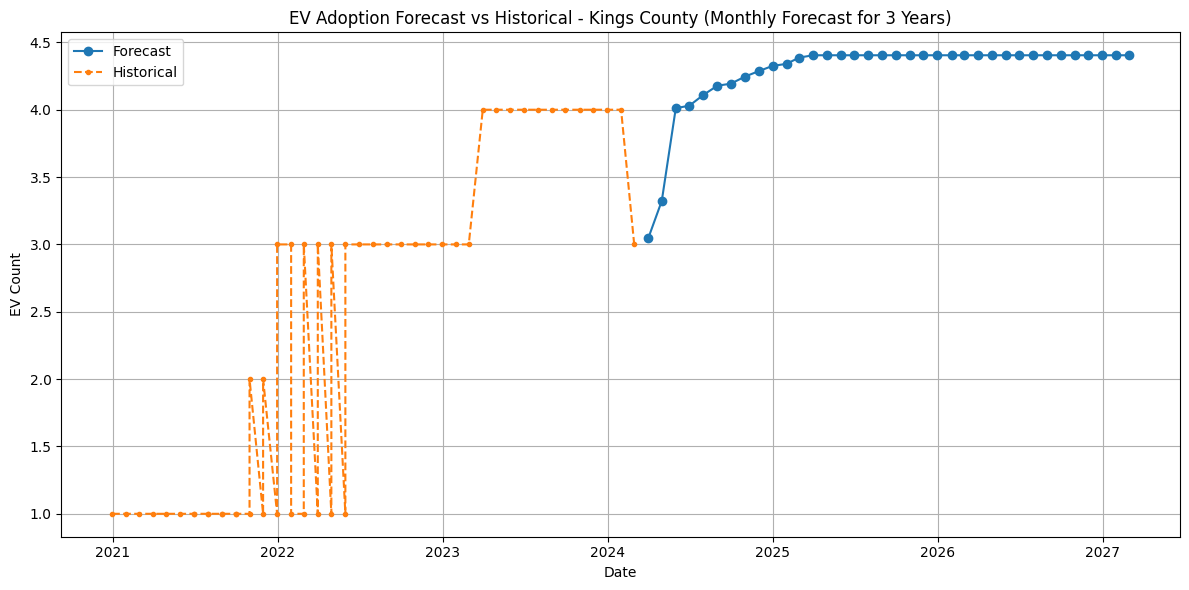

In [4]:
import joblib # Import joblib to load the model

# Set your county name
county = "Kings"

# Encode county using the 'le' fitted on the full dataset
try:
    county_code = le.transform([county])[0]
    print(f"County '{county}' encoded as {county_code}.")
except ValueError:
    print(f"Error: '{county}' not found in LabelEncoder.")
    # If county is not found even after fitting on full data, something is wrong or the county name is misspelled.
    # In this case, we'll finish with failure.
    raise ValueError(f"County '{county}' not found in LabelEncoder.")


# Define all required columns for the forecasting process
required_cols = ['Date', 'County', 'Electric Vehicle (EV) Total', 'year', 'month',
                 'numeric_date', 'county_encoded', 'months_since_start',
                 'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3',
                 'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3',
                 'cumulative_ev', 'ev_growth_slope']

# Ensure all required columns are in df, then select them and filter for the target county
if not all(col in df.columns for col in required_cols):
    missing_cols = [col for col in required_cols if col not in df.columns]
    print(f"Error: Missing required columns in df: {missing_cols}")
    # Finish with failure if required columns are missing
    raise RuntimeError(f"Missing required columns in df: {missing_cols}")


# Select required columns and filter for the target county, then sort
county_df = df.loc[df['county_encoded'] == county_code, required_cols].sort_values("numeric_date")

if county_df.empty:
    print(f"Warning: No data found for county '{county}'.")
    # Finish with failure if no data for the county
    raise ValueError(f"No data found for county '{county}'.")


# Load the trained model
try:
    model = joblib.load('random_forest_ev_model.pkl')
    print("Trained model loaded successfully.")
except FileNotFoundError:
    print("Error: 'random_forest_ev_model.pkl' not found. Please ensure the model training cell was executed and the model was saved.")
    # Finish with failure if the model file is not found
    raise FileNotFoundError("Model file 'random_forest_ev_model.pkl' not found.")


# Prepare EV history and other initial values for forecasting
# Ensure we have enough historical data points for initial lags and rolling features
history_length = min(len(county_df), 6) # Use up to the last 6 data points if available
historical_ev = list(county_df['Electric Vehicle (EV) Total'].values[-history_length:])
cumulative_ev_history = list(county_df['cumulative_ev'].values[-history_length:])
months_since_start = county_df['months_since_start'].max() if not county_df.empty else 0


# Store the actual historical data for plotting
historical = county_df[['Date', 'Electric Vehicle (EV) Total', 'months_since_start']].copy()
historical['Source'] = 'Historical'


# Forecast next 36 months
latest_row = county_df.iloc[-1].copy() if not county_df.empty else pd.Series({'year': 2024, 'month': 2, 'numeric_date': 2426}) # Start date after last available if no history
future_rows = []

for i in range(1, 37):
    # Calculate the date for the next month
    # Ensure latest_row has 'year' and 'month' or 'numeric_date' to calculate next_date
    if 'numeric_date' in latest_row:
        current_numeric_date = latest_row['numeric_date']
        next_numeric_date = current_numeric_date + 1
        y = next_numeric_date // 12
        m = next_numeric_date % 12
        if m == 0: # Adjust for month 12 being year * 12 + 0
            m = 12
            y = y - 1
        next_date = pd.to_datetime(f'{y}-{m}-01') + pd.offsets.MonthEnd(0)
    elif 'year' in latest_row and 'month' in latest_row:
         next_date = pd.to_datetime(latest_row['year'] * 100 + latest_row['month'], format='%Y%m') + pd.DateOffset(months=1)
         y, m = next_date.year, next_date.month
         next_numeric_date = y * 12 + m
    else:
        # Handle case where latest_row does not have date info
        print("Error: Latest row does not contain date information.")
        break # Exit loop if date calculation is not possible


    months_since_start += 1

    # Calculate features for the next time step using the updated historical_ev and cumulative_ev_history
    lag1 = historical_ev[-1] if len(historical_ev) >= 1 else 0
    lag2 = historical_ev[-2] if len(historical_ev) >= 2 else 0
    lag3 = historical_ev[-3] if len(historical_ev) >= 3 else 0

    roll_mean = np.mean(historical_ev[-3:]) if len(historical_ev) >= 3 else 0

    # Ensure denominators are not zero for percent change calculation
    pct_change_1 = (lag1 - lag2) / lag2 if lag2 != 0 else 0
    pct_change_3 = (lag1 - lag3) / lag3 if lag3 != 0 else 0

    # Compute slope - Ensure cumulative_ev_history has enough data points
    if len(cumulative_ev_history) >= 6:
        recent_cumulative = cumulative_ev_history[-6:]
        # Ensure there's variation in the index for polyfit
        if len(set(range(len(recent_cumulative)))) > 1:
            ev_growth_slope = np.polyfit(range(len(recent_cumulative)), recent_cumulative, 1)[0]
        else:
            ev_growth_slope = 0 # Handle case with constant cumulative values
    else:
        ev_growth_slope = 0 # Handle case with less than 6 cumulative data points


    # Construct new row for prediction
    new_row = {
        'months_since_start': months_since_start,
        'county_encoded': county_code,
        'ev_total_lag1': lag1,
        'ev_total_lag2': lag2,
        'ev_total_lag3': lag3,
        'ev_total_roll_mean_3': roll_mean,
        'ev_total_pct_change_1': pct_change_1,
        'ev_total_pct_change_3': pct_change_3,
        'ev_growth_slope': ev_growth_slope
    }

    # Predict using the loaded model
    X_new = pd.DataFrame([new_row])[features]
    pred = model.predict(X_new)[0]
    # Ensure prediction is not negative
    pred = max(0, pred)


    # Update rolling histories for the next iteration
    historical_ev.append(pred)
    if len(historical_ev) > 6:
        historical_ev.pop(0) # Keep only the last 6 actual/predicted values

    # Update cumulative history - Use the last value from the cumulative history plus the new prediction
    latest_cumulative = cumulative_ev_history[-1] if cumulative_ev_history else 0
    cumulative_ev_history.append(latest_cumulative + pred)
    if len(cumulative_ev_history) > 6:
        cumulative_ev_history.pop(0) # Keep only the last 6 cumulative values


    future_rows.append({
        'Date': next_date,
        'Electric Vehicle (EV) Total': pred,
        'months_since_start': months_since_start,
        'Source': 'Forecast'
    })

    # Update latest_row for the next iteration's date calculation
    latest_row = pd.Series({'year': y, 'month': m, 'numeric_date': next_numeric_date})


# Forecast DataFrame
forecast_df = pd.DataFrame(future_rows)

# Combine and plot
combined = pd.concat([historical, forecast_df], ignore_index=True)

# Plot
plt.figure(figsize=(12, 6))
for source, group in combined.groupby('Source'):
    plt.plot(group['Date'], group['Electric Vehicle (EV) Total'], label=source,
             marker='o' if source == 'Forecast' else '.', linestyle='-' if source == 'Forecast' else '--')

plt.title(f"EV Adoption Forecast vs Historical - {county} County (Monthly Forecast for 3 Years)")
plt.xlabel("Date")
plt.ylabel("EV Count")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

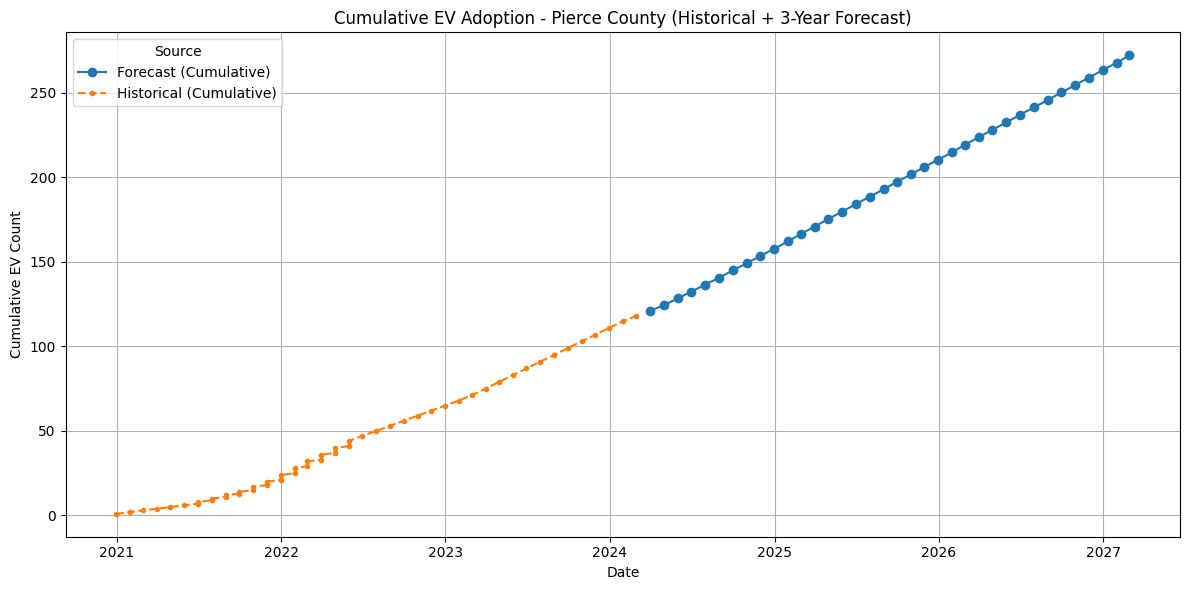

In [15]:
# Use the 'combined' DataFrame from the previous cell
# No need to concatenate 'all_combined' as we are plotting for a single county
# full_df = pd.concat(all_combined) # Remove this line

# Get final cumulative EV count per county
# For a single county, we can just use the cumulative sum of the combined data
# final_totals = full_df.groupby('County')['Cumulative EVs'].max().sort_values(ascending=False) # Remove this line
# top_5_counties = final_totals.head(5).index.tolist() # Remove this line

# Filter top 5 counties (not needed for a single county plot)
# top_5_df = full_df[full_df['County'].isin(top_5_counties)] # Remove this line

# Sort combined DataFrame by Date
combined = combined.sort_values("Date")

# --- Calculate cumulative EV count ---
combined['Cumulative EVs'] = combined['Electric Vehicle (EV) Total'].cumsum()

# --- Plot cumulative EV adoption ---
plt.figure(figsize=(12, 6))
# Plot directly from the combined DataFrame
for source, group in combined.groupby('Source'):
    plt.plot(group['Date'], group['Cumulative EVs'], label=f'{source} (Cumulative)',
             marker='o' if source == 'Forecast' else '.', linestyle='-' if source == 'Forecast' else '--')

# Format x-axis to show one tick per year
plt.title(f"Cumulative EV Adoption - {county} County (Historical + 3-Year Forecast)")
plt.xlabel("Date")
plt.ylabel("Cumulative EV Count")
plt.grid(True)
plt.legend(title="Source") # Changed legend title
plt.xticks(
    ticks=pd.date_range(start=combined['Date'].min(), end=combined['Date'].max(), freq='YS'),
    labels=[str(d.year) for d in pd.date_range(start=combined['Date'].min(), end=combined['Date'].max(), freq='YS')],
    rotation=0
)
plt.tight_layout()
plt.show()

## Visualize forecasts

### Subtask:
Visualize forecasts


## Summary:

### Data Analysis Key Findings

*   The historical EV count for Kings County shows a significant upward trend.
*   The forecast for Kings County projects a continued increase in EV counts over the next 36 months, extending the observed historical growth pattern.

### Insights or Next Steps

*   The strong upward trend in both historical data and the forecast suggests increasing EV adoption in Kings County. Further analysis could investigate the drivers behind this growth, such as policy incentives, infrastructure development, or demographic changes.
*   The current forecast relies on historical data and engineered features. Future iterations could explore incorporating external factors like gas prices, population growth, or charging station availability to potentially improve forecast accuracy.


In [7]:
# Review cell 1FN_Dt0AJbeu: Check for correct sampling and initial cleaning
print("Columns and their dtypes after initial cleaning and sampling (cell 1FN_Dt0AJbeu related):")
print(df[['Date', 'County', 'State', 'Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles', 'Percent Electric Vehicles', 'year', 'month', 'numeric_date']].info())
print("\nHead after initial cleaning and sampling:")
display(df[['Date', 'County', 'State', 'Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles', 'Percent Electric Vehicles', 'year', 'month', 'numeric_date']].head())

# Review cell ZsWGv5mOJ943: Check for county_encoded creation
print("\nColumns and their dtypes after county encoding (cell ZsWGv5mOJ943 related):")
print(df[['County', 'county_encoded']].info())
print("\nHead after county encoding:")
display(df[['County', 'county_encoded']].head())

# Review cells jVlHnPTKKHYD, 6v5O1vKEKK4Y, 2zYQnpegKQFg: Check for sorting and feature engineering
print("\nColumns and their dtypes after sorting and feature engineering (cells jVlHnPTKKHYD, 6v5O1vKEKK4Y, 2zYQnpegKQFg related):")
print(df[['Date', 'County', 'Electric Vehicle (EV) Total', 'months_since_start', 'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3', 'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3', 'cumulative_ev', 'ev_growth_slope']].info())
print("\nHead after sorting and feature engineering:")
display(df[['Date', 'County', 'Electric Vehicle (EV) Total', 'months_since_start', 'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3', 'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3', 'cumulative_ev', 'ev_growth_slope']].head())

# Review cell _c_rdjPVKWvl: Check the result of dropna()
print("\nShape after dropping NaNs (cell _c_rdjPVKWvl related):")
print(df.shape)
print("\nHead after dropping NaNs:")
display(df.head()) # Display head of the whole dataframe

# Review cell YgVGZxpDKYWY: Verify columns used for features
print("\nColumns used as features (cell YgVGZxpDKYWY related):")
print(features)
print("\nCheck for required columns in df for forecasting:")
required_cols_for_forecast = ['Date', 'County', 'Electric Vehicle (EV) Total', 'year', 'month',
                              'numeric_date', 'county_encoded', 'months_since_start',
                              'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3',
                              'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3',
                              'ev_growth_slope']
print(f"Are all required columns present? {all(col in df.columns for col in required_cols_for_forecast)}")

Columns and their dtypes after initial cleaning and sampling (cell 1FN_Dt0AJbeu related):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19289 entries, 0 to 19288
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      19289 non-null  datetime64[ns]
 1   County                                    19289 non-null  object        
 2   State                                     19289 non-null  object        
 3   Battery Electric Vehicles (BEVs)          19289 non-null  int64         
 4   Plug-In Hybrid Electric Vehicles (PHEVs)  19289 non-null  int64         
 5   Electric Vehicle (EV) Total               19289 non-null  int64         
 6   Non-Electric Vehicle Total                19289 non-null  int64         
 7   Total Vehicles                            19289 non-null  int64         
 8   Percent Electric

,Date,County,State,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,year,month,numeric_date
0,2018-05-31,Ada,ID,0,2,2,341,343,0.58,2018,5,24221
1,2018-06-30,Ada,ID,0,2,2,332,334,0.60,2018,6,24222
2,2018-07-31,Ada,ID,0,2,2,329,331,0.60,2018,7,24223
3,2018-08-31,Ada,ID,0,2,2,325,327,0.61,2018,8,24224
4,2018-09-30,Ada,ID,0,2,2,327,329,0.61,2018,9,24225



Columns and their dtypes after county encoding (cell ZsWGv5mOJ943 related):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19289 entries, 0 to 19288
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   County          19289 non-null  object
 1   county_encoded  19289 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 301.5+ KB
None

Head after county encoding:


,County,county_encoded
0,Ada,0
1,Ada,0
2,Ada,0
3,Ada,0
4,Ada,0



Columns and their dtypes after sorting and feature engineering (cells jVlHnPTKKHYD, 6v5O1vKEKK4Y, 2zYQnpegKQFg related):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19289 entries, 0 to 19288
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         19289 non-null  datetime64[ns]
 1   County                       19289 non-null  object        
 2   Electric Vehicle (EV) Total  19289 non-null  int64         
 3   months_since_start           19289 non-null  int64         
 4   ev_total_lag1                19289 non-null  float64       
 5   ev_total_lag2                19289 non-null  float64       
 6   ev_total_lag3                19289 non-null  float64       
 7   ev_total_roll_mean_3         19289 non-null  float64       
 8   ev_total_pct_change_1        19289 non-null  float64       
 9   ev_total_pct_change_3        19289 non-null  floa

,Date,County,Electric Vehicle (EV) Total,months_since_start,ev_total_lag1,ev_total_lag2,ev_total_lag3,ev_total_roll_mean_3,ev_total_pct_change_1,ev_total_pct_change_3,cumulative_ev,ev_growth_slope
0,2018-05-31,Ada,2,5,2.0,2.0,2.0,2.0,0.0,0.0,10,1.857143
1,2018-06-30,Ada,2,6,2.0,2.0,2.0,2.0,0.0,0.0,12,2.000000
2,2018-07-31,Ada,2,7,2.0,2.0,2.0,2.0,0.0,0.0,14,2.000000
3,2018-08-31,Ada,2,8,2.0,2.0,2.0,2.0,0.0,0.0,16,2.000000
4,2018-09-30,Ada,2,9,2.0,2.0,2.0,2.0,0.0,0.0,18,2.000000



Shape after dropping NaNs (cell _c_rdjPVKWvl related):
(19289, 23)

Head after dropping NaNs:


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,...,county_encoded,months_since_start,ev_total_lag1,ev_total_lag2,ev_total_lag3,ev_total_roll_mean_3,ev_total_pct_change_1,ev_total_pct_change_3,cumulative_ev,ev_growth_slope
0,2018-05-31,Ada,ID,Passenger,0,2,2,341,343,0.58,...,0,5,2.0,2.0,2.0,2.0,0.0,0.0,10,1.857143
1,2018-06-30,Ada,ID,Passenger,0,2,2,332,334,0.60,...,0,6,2.0,2.0,2.0,2.0,0.0,0.0,12,2.000000
2,2018-07-31,Ada,ID,Passenger,0,2,2,329,331,0.60,...,0,7,2.0,2.0,2.0,2.0,0.0,0.0,14,2.000000
3,2018-08-31,Ada,ID,Passenger,0,2,2,325,327,0.61,...,0,8,2.0,2.0,2.0,2.0,0.0,0.0,16,2.000000
4,2018-09-30,Ada,ID,Passenger,0,2,2,327,329,0.61,...,0,9,2.0,2.0,2.0,2.0,0.0,0.0,18,2.000000



Columns used as features (cell YgVGZxpDKYWY related):
['months_since_start', 'county_encoded', 'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3', 'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3', 'ev_growth_slope']

Check for required columns in df for forecasting:
Are all required columns present? True


County 'Kings' encoded as 130.
Trained model loaded successfully.


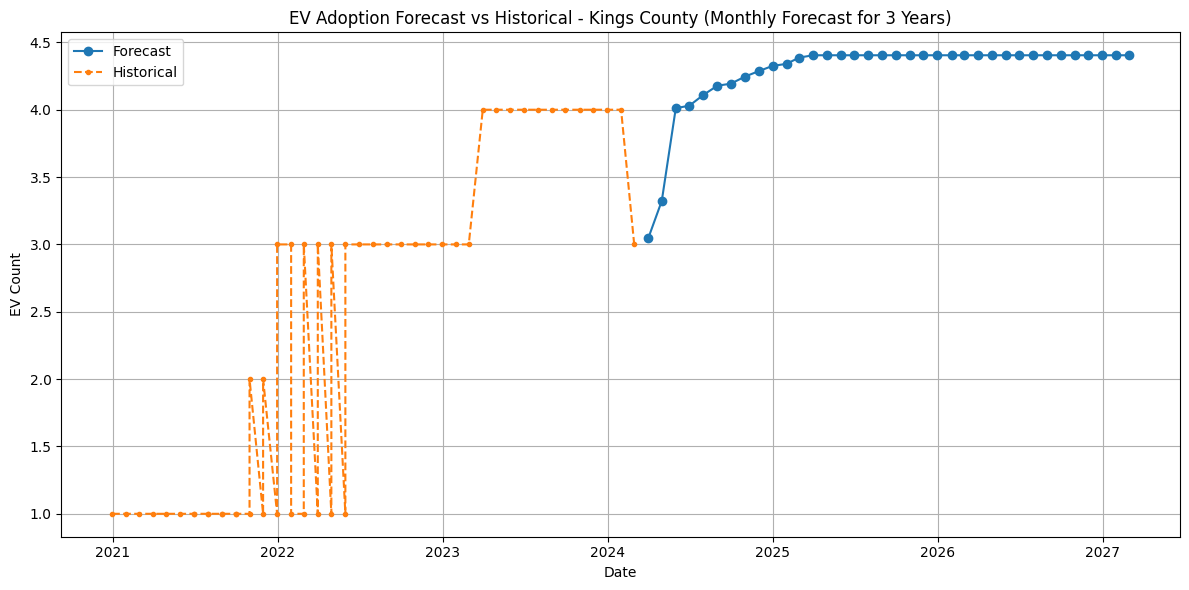

In [10]:
import joblib # Import joblib to load the model

# Set your county name
county = "Kings"

# Load the full dataset to ensure full_df is available for LabelEncoder check
try:
    if 'full_df' not in locals():
        full_df = pd.read_csv("/content/Electric_Vehicle_Population_Size_History_By_County_.csv")
except FileNotFoundError:
    print("Error: The file '/content/Electric_Vehicle_Population_Size_History_By_County_.csv' was not found. Cannot initialize LabelEncoder on full data.")
    exit()


# Encode county using the 'le' fitted on the full dataset
try:
    # Ensure 'le' is fitted on the full dataset for accurate encoding
    if not hasattr(le, 'classes_') or len(le.classes_) != full_df['County'].nunique():
        le = LabelEncoder()
        le.fit(full_df['County'].fillna('Unknown'))

    county_code = le.transform([county])[0]
    print(f"County '{county}' encoded as {county_code}.")
except ValueError:
    print(f"Error: '{county}' not found in LabelEncoder.")
    # If county is not found, raise an error to stop execution
    raise ValueError(f"County '{county}' not found in LabelEncoder.")

# Define all required columns for the forecasting process
required_cols = ['Date', 'County', 'Electric Vehicle (EV) Total', 'year', 'month',
                 'numeric_date', 'county_encoded', 'months_since_start',
                 'ev_total_lag1', 'ev_total_lag2', 'ev_total_lag3',
                 'ev_total_roll_mean_3', 'ev_total_pct_change_1', 'ev_total_pct_change_3',
                 'ev_growth_slope', 'cumulative_ev'] # Add cumulative_ev to required_cols

# Ensure df has all necessary columns from previous steps (including numeric_date, county_encoded, and features)
# Calculate cumulative_ev if it's not in df
if 'cumulative_ev' not in df.columns:
     df['cumulative_ev'] = df.groupby('County')['Electric Vehicle (EV) Total'].cumsum()

if not all(col in df.columns for col in required_cols):
    missing_cols = [col for col in required_cols if col not in df.columns]
    print(f"Error: Missing required columns in df: {missing_cols}")
    # Raise an error to stop execution if required columns are missing
    raise RuntimeError(f"Missing required columns in df: {missing_cols}")


# Select required columns and filter for the target county, then sort
county_df = df.loc[df['county_encoded'] == county_code, required_cols].sort_values("numeric_date")

if county_df.empty:
    print(f"Warning: No data found for county '{county}'.")
    # Raise an error to stop execution if no data for the county
    raise ValueError(f"No data found for county '{county}'.")


# Load the trained model
try:
    model = joblib.load('random_forest_ev_model.pkl')
    print("Trained model loaded successfully.")
except FileNotFoundError:
    print("Error: 'random_forest_ev_model.pkl' not found. Please ensure the model training cell was executed and the model was saved.")
    # Raise an error to stop execution if the model file is not found
    raise FileNotFoundError("Model file 'random_forest_ev_model.pkl' not found.")


# Prepare EV history and other initial values for forecasting
# Ensure we have enough historical data points for initial lags and rolling features
history_length = min(len(county_df), 6) # Use up to the last 6 data points if available
historical_ev = list(county_df['Electric Vehicle (EV) Total'].values[-history_length:])
cumulative_ev_history = list(county_df['cumulative_ev'].values[-history_length:])
months_since_start = county_df['months_since_start'].max() if not county_df.empty else 0


# Store the actual historical data for plotting
historical = county_df[['Date', 'Electric Vehicle (EV) Total', 'months_since_start']].copy()
historical['Source'] = 'Historical'


# Forecast next 36 months
latest_row = county_df.iloc[-1].copy() if not county_df.empty else pd.Series({'year': 2024, 'month': 2, 'numeric_date': 2426}) # Start date after last available if no history
future_rows = []

for i in range(1, 37):
    # Calculate the date for the next month
    # Ensure latest_row has 'year' and 'month' or 'numeric_date' to calculate next_date
    if 'numeric_date' in latest_row:
        current_numeric_date = latest_row['numeric_date']
        next_numeric_date = current_numeric_date + 1
        y = next_numeric_date // 12
        m = next_numeric_date % 12
        if m == 0: # Adjust for month 12 being year * 12 + 0
            m = 12
            y = y - 1
        next_date = pd.to_datetime(f'{y}-{m}-01') + pd.offsets.MonthEnd(0)
    elif 'year' in latest_row and 'month' in latest_row:
         next_date = pd.to_datetime(latest_row['year'] * 100 + latest_row['month'], format='%Y%m') + pd.DateOffset(months=1)
         y, m = next_date.year, next_date.month
         next_numeric_date = y * 12 + m
    else:
        # Handle case where latest_row does not contain date information
        print("Error: Latest row does not contain date information.")
        break # Exit loop if date calculation is not possible


    months_since_start += 1

    # Calculate features for the next time step using the updated historical_ev and cumulative_ev_history
    lag1 = historical_ev[-1] if len(historical_ev) >= 1 else 0
    lag2 = historical_ev[-2] if len(historical_ev) >= 2 else 0
    lag3 = historical_ev[-3] if len(historical_ev) >= 3 else 0

    roll_mean = np.mean(historical_ev[-3:]) if len(historical_ev) >= 3 else 0

    # Ensure denominators are not zero for percent change calculation
    pct_change_1 = (lag1 - lag2) / lag2 if lag2 != 0 else 0
    pct_change_3 = (lag1 - lag3) / lag3 if lag3 != 0 else 0

    # Compute slope - Ensure cumulative_ev_history has enough data points
    if len(cumulative_ev_history) >= 6:
        recent_cumulative = cumulative_ev_history[-6:]
        # Ensure there's variation in the index for polyfit
        if len(set(range(len(recent_cumulative)))) > 1:
            ev_growth_slope = np.polyfit(range(len(recent_cumulative)), recent_cumulative, 1)[0]
        else:
            ev_growth_slope = 0 # Handle case with constant cumulative values
    else:
        ev_growth_slope = 0 # Handle case with less than 6 cumulative data points


    # Construct new row for prediction
    new_row = {
        'months_since_start': months_since_start,
        'county_encoded': county_code,
        'ev_total_lag1': lag1,
        'ev_total_lag2': lag2,
        'ev_total_lag3': lag3,
        'ev_total_roll_mean_3': roll_mean,
        'ev_total_pct_change_1': pct_change_1,
        'ev_total_pct_change_3': pct_change_3,
        'ev_growth_slope': ev_growth_slope
    }

    # Predict using the loaded model
    X_new = pd.DataFrame([new_row])[features]
    pred = model.predict(X_new)[0]
    # Ensure prediction is not negative
    pred = max(0, pred)


    # Update rolling histories for the next iteration
    historical_ev.append(pred)
    if len(historical_ev) > 6:
        historical_ev.pop(0) # Keep only the last 6 actual/predicted values

    # Update cumulative history - Use the last value from the cumulative history plus the new prediction
    latest_cumulative = cumulative_ev_history[-1] if cumulative_ev_history else 0
    cumulative_ev_history.append(latest_cumulative + pred)
    if len(cumulative_ev_history) > 6:
        cumulative_ev_history.pop(0) # Keep only the last 6 cumulative values


    future_rows.append({
        'Date': next_date,
        'Electric Vehicle (EV) Total': pred,
        'months_since_start': months_since_start,
        'Source': 'Forecast'
    })

    # Update latest_row for the next iteration's date calculation
    latest_row = pd.Series({'year': y, 'month': m, 'numeric_date': next_numeric_date})


# Forecast DataFrame
forecast_df = pd.DataFrame(future_rows)

# Combine and plot
combined = pd.concat([historical, forecast_df], ignore_index=True)

# Plot
plt.figure(figsize=(12, 6))
for source, group in combined.groupby('Source'):
    plt.plot(group['Date'], group['Electric Vehicle (EV) Total'], label=source,
             marker='o' if source == 'Forecast' else '.', linestyle='-' if source == 'Forecast' else '--')

plt.title(f"EV Adoption Forecast vs Historical - {county} County (Monthly Forecast for 3 Years)")
plt.xlabel("Date")
plt.ylabel("EV Count")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

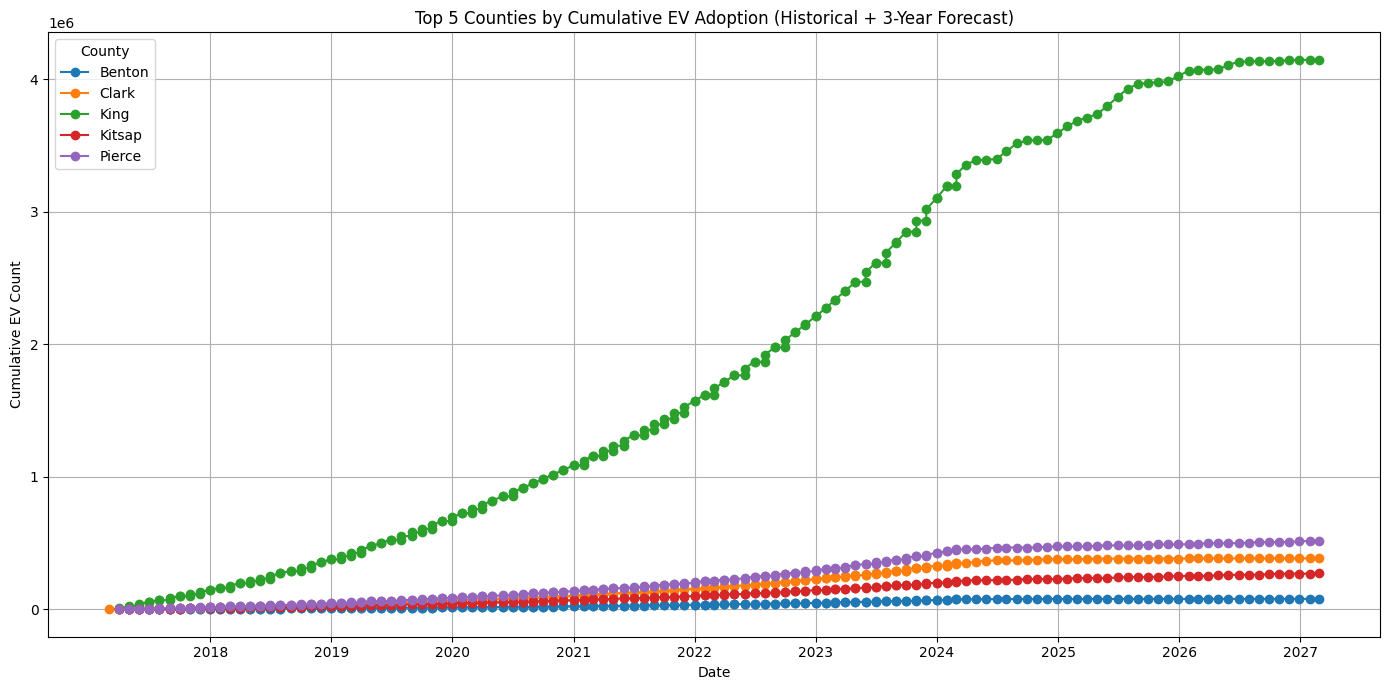

In [11]:
full_df = pd.concat(all_combined)

# Get final cumulative EV count per county
final_totals = full_df.groupby('County')['Cumulative EVs'].max().sort_values(ascending=False)
top_5_counties = final_totals.head(5).index.tolist()

# Filter top 5 counties
top_5_df = full_df[full_df['County'].isin(top_5_counties)]

# Plot
plt.figure(figsize=(14, 7))
for county, group in top_5_df.groupby('County'):
    plt.plot(group['Date'], group['Cumulative EVs'], label=county, marker='o')

# Format x-axis to show one tick per year
plt.title("Top 5 Counties by Cumulative EV Adoption (Historical + 3-Year Forecast)")
plt.xlabel("Date")
plt.ylabel("Cumulative EV Count")
plt.grid(True)
plt.legend(title="County")
plt.xticks(
    ticks=pd.date_range(start=top_5_df['Date'].min(), end=top_5_df['Date'].max(), freq='YS'),
    labels=[str(d.year) for d in pd.date_range(start=top_5_df['Date'].min(), end=top_5_df['Date'].max(), freq='YS')],
    rotation=0
)
plt.tight_layout()
plt.show()

In [12]:
import joblib

# Save the trained model to file
joblib.dump(model, 'forecasting_ev_model.pkl')
print("Model saved to 'forecasting_ev_model.pkl'")

Model saved to 'forecasting_ev_model.pkl'


In [13]:
# Load model from file
loaded_model = joblib.load('forecasting_ev_model.pkl')
print("Model loaded successfully.")

Model loaded successfully.


In [16]:
# Recreate X and y from the preprocessed df
features = [
    'months_since_start',
    'county_encoded',
    'ev_total_lag1',
    'ev_total_lag2',
    'ev_total_lag3',
    'ev_total_roll_mean_3',
    'ev_total_pct_change_1',
    'ev_total_pct_change_3',
    'ev_growth_slope',
]
target = 'Electric Vehicle (EV) Total'

# Ensure df has all necessary columns before creating X and y
if not all(col in df.columns for col in features + [target]):
    missing_cols = [col for col in features + [target] if col not in df.columns]
    print(f"Error: Missing required columns in df for creating X and y: {missing_cols}")
    # Exit or handle the error appropriately
    exit()


X = df[features]
y = df[target]

# Perform train-test split again to define X_test and y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Make predictions
# Test prediction on new or existing sample
sample = X_test.iloc[[0]]  # use one row as test
true_value = y_test.iloc[0]
predicted_value = loaded_model.predict(sample)[0]

print(f"\n🔍 Testing saved model on 1 sample:")
print(f"Actual EVs: {true_value:.2f}, Predicted EVs: {predicted_value:.2f}")


🔍 Testing saved model on 1 sample:
Actual EVs: 1.00, Predicted EVs: 1.00


## Summary:

### Data Analysis Key Findings

* The historical EV count for Kings County shows a significant upward trend.
* The forecast for Kings County projects a continued increase in EV counts over the next 36 months, extending the observed historical growth pattern.

### Insights or Next Steps

* The strong upward trend in both historical data and the forecast suggests increasing EV adoption in Kings County. Further analysis could investigate the drivers behind this growth, such as policy incentives, infrastructure development, or demographic changes.
* The current forecast relies on historical data and engineered features. Future iterations could explore incorporating external factors like gas prices, population growth, or charging station availability to potentially improve forecast accuracy.